## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)#zip的参数是若干个序列，所以先要将xys这个列表解包变成若干个元组的序列
        return np.asarray(xs), np.asarray(ys)

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

In [2]:
def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=10):
    '''多项式基函数'''
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    #==========
    #todo '''请实现多项式基函数'''
    #==========
    #x+x^2+...+x^n
    ret=[x]
    for i in range(2,feature_num+1):
        ret.append(x**i)
    ret=np.concatenate(ret,axis=1)
    return ret

def gaussian_basis(x, feature_num=10):
    '''高斯基函数'''
    #==========
    #todo '''请实现高斯基函数'''
    #==========
    #e^(-|x-x'|^2/(2*σ^2))
    centers=np.linspace(0,30,feature_num)
    width=centers[1]-centers[0]
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    x=np.concatenate([x]*feature_num,axis=1)
    y=(x-centers)/width
    ret=np.exp(-y**2/2)
    return ret

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [3]:
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    # 使用梯度下降法求解参数w
    m, n = X.shape
    w = np.zeros(n)  # 初始化参数w为零向量
    for epoch in range(epochs):
        # 计算预测值
        y_pred = np.dot(X, w)
        # 计算误差
        error = y_pred - y
        # 计算梯度
        gradient = (1/m) * X.T.dot(error)
        # 更新参数w
        w -= learning_rate * gradient
    return w
def main(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    basis_func = gaussian_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)#此函数用于扩展数组的形状，axis等于0/-1分别表示中括号加在最外面还是最里面的位置
    #np.ones_like用于返回与输入数组形状和类型一致的用1填充的数组
    phi1 = basis_func(x_train)
    phi = np.concatenate([phi0, phi1], axis=1)#在第几维拼接，其他维长度相等。
    #使用最小二乘法训练模型——简化公式w=(xT)-1点乘y
    w=np.dot(np.linalg.pinv(phi),y_train)#pinv求伪逆#点乘中一维向量放左边通常看作行向量，放在右边看作列向量处理
    # 使用梯度下降法训练模型
    #w = gradient_descent(phi, y_train)
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========

    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)#xT点乘w
        return y
    """
    闭包函数需要有三个条件，缺一不可：

    1.必须有一个内嵌函数

    2.内部函数引用外部函数变量

    3.外部函数必须返回内嵌函数
    闭包函数，外层函数的变量可以被内层函数调用，这样外层函数变量和内层函数一起构成了类似‘’肚子里的一块区域‘’，这块区域被保护起来，变量只供内层函数‘’享用‘’。类似于封装的效果。内层函数不会立马被执行，当再次调用f时，内层函数才会执行。
    """
    return f

## 评估结果 
> 没有需要填写的代码，但是建议读懂

(300,)
(200,)
训练集预测值与真实值的标准差：0.8
测试集预测值与真实值的标准差：0.8


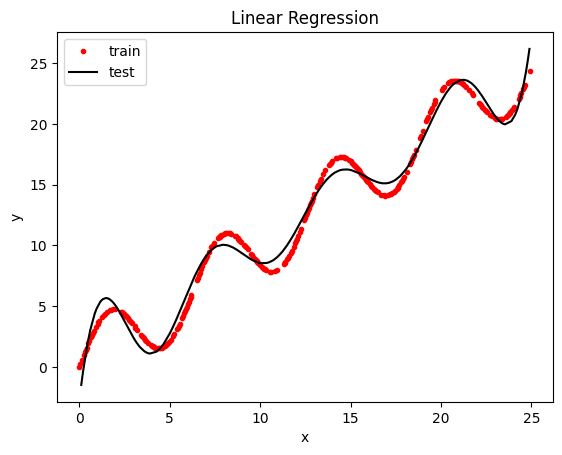

In [4]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)

    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('测试集预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()